In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# import file
from google.colab import files
files=files.upload()

Saving telecom_churn_data.csv to telecom_churn_data.csv


In [91]:
df=pd.read_csv('telecom_churn_data.csv')

In [92]:
df.shape

(99999, 226)

In [93]:
df.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,...,150.76,109.61,0.0,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.2,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.0,0.0,0.0,...,0.00,0.00,0.0,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.0,0.00


In [94]:
null_values=pd.DataFrame(df.isnull().sum())

In [95]:
null_values.reset_index(level=0, inplace=True) 

In [96]:
null_values.columns =['Feature', 'Null_values'] 

In [97]:
null_values

,Feature,Null_values
0,mobile_number,0
1,circle_id,0
2,loc_og_t2o_mou,1018
3,std_og_t2o_mou,1018
4,loc_ic_t2o_mou,1018
...,...,...
221,aon,0
222,aug_vbc_3g,0
223,jul_vbc_3g,0
224,jun_vbc_3g,0


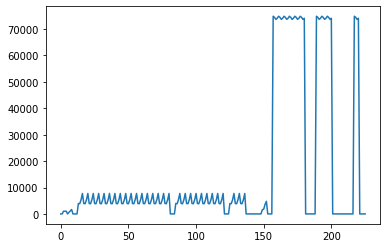

In [98]:
null_values['Null_values'].plot()

##### drop feature with more than 50% of null values

In [99]:
thresh = len(df) * .5
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [100]:
df.shape

(99999, 186)

In [101]:
df['avg_6_7']=df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)

In [102]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,252,0,6/21/2014,7/16/2014,08-08-2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,307.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.00,229.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,0,200,86,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.0,0.0,4.17,0.00,241.5
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,50,50,6/28/2014,7/31/2014,8/31/2014,9/30/2014,30,50,50,30,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.0,0.0,0.00,0.00,270.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,110,50,6/26/2014,7/28/2014,08-09-2014,9/28/2014,50,110,110,50,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.0,0.0,0.00,0.00,273.0


In [103]:
df['avg_6_7'].quantile(0.7)

368.5

In [104]:
filtered_df=df[df['avg_6_7']>(df['avg_6_7'].quantile(0.7))]

In [105]:
filtered_df.shape

(29979, 187)

In [106]:
## feature creation

In [107]:
filtered_df['churn_flag'] = np.where(
                            ((filtered_df['total_ic_mou_9'] == 0.00) | (filtered_df['total_og_mou_9'] == 0.00))
                            & ((filtered_df['vol_2g_mb_9'] == 0.00) | (filtered_df['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [108]:
filtered_df['churn_flag'].value_counts(normalize=True)

0    0.898496
1    0.101504
Name: churn_flag, dtype: float64

#drop feature _9
https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe

In [109]:
filtered_df.drop(list(filtered_df.filter(regex = '_9')), axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [110]:
filtered_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,...,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_6_7,churn_flag
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,...,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,...,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,...,6,4,11,507,253,717,110,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,...,10,6,2,570,348,160,110,110,130,6/30/2014,7/31/2014,8/14/2014,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,...,19,2,4,816,0,30,110,0,30,6/30/2014,7/30/2014,8/25/2014,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

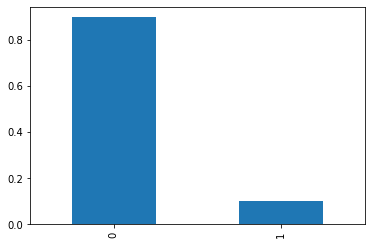

In [112]:
filtered_df['churn_flag'].value_counts(normalize=True).plot(kind='bar');

In [113]:
filtered_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'avg_6_7', 'churn_flag'],
      dtype='object', length=144)

In [114]:
label=filtered_df['churn_flag']
filtered_df.drop('churn_flag',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
filtered_df.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
avg_6_7           float64
Length: 143, dtype: object

In [116]:
filtered_df.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [117]:
filtered_df.isnull().sum()

mobile_number       0
circle_id           0
loc_og_t2o_mou    114
std_og_t2o_mou    114
loc_ic_t2o_mou    114
                 ... 
aug_vbc_3g          0
jul_vbc_3g          0
jun_vbc_3g          0
sep_vbc_3g          0
avg_6_7             0
Length: 137, dtype: int64

In [118]:
filtered_df.fillna(filtered_df.median(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


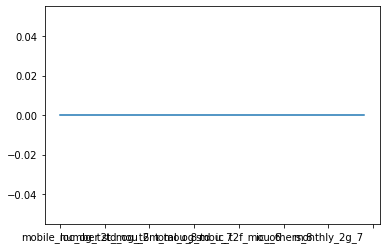

In [119]:
(filtered_df.isnull().sum()).plot()
plt.show()

In [120]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(filtered_df)
print(standardized_data.shape)


(29979, 137)


In [121]:
from sklearn import decomposition
pca=decomposition.PCA()

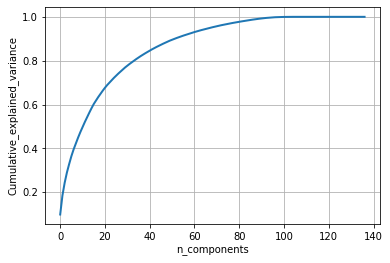

In [122]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 137
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



In [123]:
# configuring the parameteres
# the number of components = 70
pca.n_components = 70
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 70-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (29979, 70)


In [124]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data)


In [125]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,7.068137,-1.360029,5.431321,1.807314,4.610562,4.043944,0.519147,-1.097191,4.072578,-1.380370,0.428557,-0.789381,-0.880516,0.340009,0.758782,1.284245,-2.895534,1.428722,-1.698511,-0.737749,-1.740846,0.574700,4.510437,0.033208,-0.031481,-3.252396,-0.597207,-2.332005,-0.999943,-0.438342,-2.244389,-0.087125,1.610364,1.376582,1.868809,1.304467,1.075275,2.336284,1.324707,-0.757784,-0.347112,1.286150,-1.436633,-0.408632,-0.803958,-0.557000,-0.815106,-0.271754,-1.819438,0.891933,0.824047,-0.036834,-0.171341,0.356342,0.699311,0.250319,0.341554,-2.024172,1.108852,-3.844382,1.008021,0.163504,0.635314,0.395200,-0.299683,0.086405,1.153926,-0.730927,0.540556,0.648485,1.0
1,-2.953374,-0.539958,0.056788,-0.912018,-1.379034,-0.438061,0.405783,1.206322,0.455533,0.557651,-0.413651,0.604824,0.145099,-0.048964,-0.074653,0.067746,1.039189,-0.003575,0.190260,-0.076375,0.019070,-0.203658,-0.712243,-0.227198,-0.448648,-0.308870,-0.851654,0.032299,-0.011318,-0.251770,-0.982074,-0.447741,-0.205503,-0.025122,-0.071325,-0.281834,-0.518159,0.087033,0.194642,-0.013286,-0.298205,0.826065,0.828113,-0.586299,0.287069,0.624387,-0.831061,-0.117790,-0.178210,-0.317207,1.515402,0.109216,1.249307,1.575516,-0.704680,-0.231888,-0.179941,-0.082291,-0.030850,0.138894,-0.248021,-0.160893,0.202305,0.626443,0.232223,-0.550907,0.008980,-0.507542,-0.122259,-0.040235,0.0
2,0.710301,-0.043347,-1.244452,5.513695,-0.039561,1.242561,1.699757,0.787658,-0.444346,1.029410,-0.868498,-1.847369,2.148683,3.699832,4.786076,-0.508417,-0.543195,-0.211933,-0.575528,-0.600865,-0.181994,-0.531750,2.302494,-0.925966,0.769685,1.051984,0.304377,1.471721,1.651870,1.990325,0.505714,-0.292967,-0.898864,0.307437,-1.035746,-0.198979,-0.508282,-0.756360,-0.080314,0.588789,-0.918417,-0.306600,-0.273329,-0.963849,-1.755661,0.054114,-0.955728,-0.073161,1.073769,1.202336,-0.104476,2.128324,1.434972,-0.282141,1.103885,-0.615231,0.168162,-0.815867,-0.087025,0.211665,-0.554643,-0.391175,2.292743,0.007712,2.534125,0.455612,0.307289,0.755678,1.245312,0.289029,0.0
3,-1.366504,-1.891127,-0.967533,1.092725,0.805803,0.598069,0.301975,0.356029,-0.606621,0.832324,-0.038171,-0.238016,-0.815754,-0.128875,-0.182177,-0.032708,-0.039251,0.123388,-0.090319,0.345322,0.078242,0.041725,-0.159929,0.099525,0.139103,0.009607,0.052601,-0.654550,-0.796664,0.173228,-0.081937,0.000020,0.239721,0.112502,-0.208860,-0.146288,0.200971,0.106027,0.203095,-0.184873,-0.023936,0.153321,-0.164697,-0.189150,0.267970,0.258149,-0.025147,0.145179,-0.243789,-0.075704,0.015361,-0.398574,-0.216775,0.016463,-0.036062,-0.093152,-0.402866,0.542206,-0.297316,0.159293,-0.093347,0.523525,-0.112732,-0.195517,0.179909,-0.136365,-0.405209,0.278737,-0.035376,-0.026665,0.0
4,-4.302241,0.177293,-0.840640,-0.438721,-0.301310,1.226191,1.016193,-0.339877,-1.021661,1.664209,1.556866,1.627428,0.091014,-0.435468,0.512947,-0.171256,0.218590,-0.059642,-0.000226,-0.250260,0.154865,-0.068957,0.862117,-0.512776,0.423551,0.480504,0.079454,-0.818694,-0.999009,0.473485,0.501032,-0.880199,-0.221914,1.077716,-0.111631,0.206046,-0.048579,-0.295754,-0.702541,0.268021,0.751270,1.445545,0.478479,0.546607,-0.125986,-0.103660,0.172136,-0.029870,0.004418,-0.183592,0.103583,0.218534,-0.548254,0.307475,0.017026,0.068526,0.077590,-0.107391,0.149932,0.046206,0.108552,-0.168257,-0.301332,-0.041387,-0.017949,-0.130373,0.164964,0.771515,0.360751,-0.058062,0.0


In [128]:
obj_pred=pca_df[70]
pca_df.drop(70,axis=1,inplace=True)
from sklearn.model_selection import train_test_split


In [129]:
x_train,x_test,y_train,y_test=train_test_split(pca_df,obj_pred,train_size=0.75)

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
logisticRegr = LogisticRegression()

In [133]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
predictions = logisticRegr.predict(x_test)
predictions.shape

(7495,)

In [136]:
import sklearn

In [140]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[6531,  108],
       [ 658,  198]])

In [142]:
sklearn.metrics.accuracy_score(y_test,predictions)

0.8977985323549033